<a href="https://colab.research.google.com/github/CeliaDiazSanchez/UFV_visualizacion/blob/main/Ejercicios%20de%20clase/clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PARTE DE CLASE:**

Datos sobre el signifiaca de los columnas de la base de datos:

- AMOUNT: volumen de ventas en euros
- COUNTRY: país donde se ha producido esa venta
- SUBBRAND:  el producto
- YEAR: año   para cuando se ha hecho la predicción
- MONTH: mes    para cuando se ha hecho la predicción
- SCENARIO: AI_forecast, una venta que se ha predicho o actual venta que se ha producido
- FORECAST: actual las columnas son null, AI_forecast, en el periodo en el que se ha hecho, periodo dos que es el mes de enero, es siempre el numero menos uno para saber el mes
- FORECAST_YEAR: el año en el que se hizo la preducción


Preguntas:
1.	Número de filas
2.	Número de actuals y forecasts
3.	Horizonte de predicción
4.	Número de países y de productos
5.	Histórico de actuals o de forecast
6.	Cuantos forecast tiene (tener en cuenta el año tamb)


Importamos los datos:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import plotly.express as px
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/UFV_visualizacion/refs/heads/main/Ejercicios%20de%20clase/datos_ejercicio_ventas.csv?token=GHSAT0AAAAAACZ6AE56HGQSTD3XSRFB2CVMZZLT6NA"
nombre = 'datos_ejercicio_ventas.csv'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


In [6]:
datos = pd.read_csv('datos_ejercicio_ventas.csv')
datos.head(10)

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,7.543562e+05
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,5.600306e+05
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,8.850198e+04
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,3.632245e+05
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,3.961761e+05
5,Norway,Pepsi Regular (L3),2025,2,AI_forecast,AI_P09F,2023.0,2.667267e+04
6,Denmark,7up (L3),2023,12,AI_forecast,AI_PF,2023.0,0.000000e+00
7,Netherlands,Mountain Dew (L3),2024,4,AI_forecast,AI_P02F,2023.0,0.000000e+00
8,Great Britain,Pepsi Max (L3),2023,9,AI_forecast,AI_P02F,2023.0,1.138557e+07
9,Italy,Pepsi Regular (L3),2023,4,AI_forecast,AI_P03F,2023.0,2.074742e+06


In [7]:
datos.shape

(18666, 8)

In [8]:
num_filas = datos.shape[0]
print(f"Número de filas: {num_filas}")
num_colum = datos.shape[1]
print(f"Número de columnas: {num_colum}")

Número de filas: 18666
Número de columnas: 8


In [9]:
num_forecasts = datos[datos['SCENARIO'] == 'AI_forecast'].shape[0] #[0] para coger el número de filas
print(f"Número de forecasts: {num_forecasts}")

Número de forecasts: 17766


In [10]:
num_actual = datos[datos['SCENARIO'] == 'actual'].shape[0]
print(f"Número de actual: {num_actual}")

Número de actual: 900


Cual es el horizonte de predicción:
Tamaño de la predicción (por periodo), todas tienen el mimso horionte

In [11]:
portugal_pepsi = datos[(datos['COUNTRY'] == 'Portugal') & (datos['SUBBRAND'] == 'Pepsi Max (L3)') & (datos['SCENARIO'] == 'AI_forecast') & (datos['FORECAST'] == 'AI_P08F')]
portugal_pepsi.head(18)

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
1510,Portugal,Pepsi Max (L3),2024,10,AI_forecast,AI_P08F,2023.0,233111.124679
1857,Portugal,Pepsi Max (L3),2024,5,AI_forecast,AI_P08F,2023.0,230454.298236
2228,Portugal,Pepsi Max (L3),2024,2,AI_forecast,AI_P08F,2023.0,207376.207925
4863,Portugal,Pepsi Max (L3),2024,3,AI_forecast,AI_P08F,2023.0,218441.086609
5023,Portugal,Pepsi Max (L3),2023,9,AI_forecast,AI_P08F,2023.0,216684.479052
8536,Portugal,Pepsi Max (L3),2024,9,AI_forecast,AI_P08F,2023.0,237841.238642
8751,Portugal,Pepsi Max (L3),2023,12,AI_forecast,AI_P08F,2023.0,225142.744320
10065,Portugal,Pepsi Max (L3),2023,11,AI_forecast,AI_P08F,2023.0,213810.522910
10139,Portugal,Pepsi Max (L3),2024,7,AI_forecast,AI_P08F,2023.0,259488.779177
10183,Portugal,Pepsi Max (L3),2025,1,AI_forecast,AI_P08F,2023.0,224344.441163


In [12]:
portugal_pepsi.shape
print(f"El horizonte de predicción es: {portugal_pepsi.shape[0]}")

El horizonte de predicción es: 18


In [13]:
num_paises = datos['COUNTRY'].nunique()
num_productos = datos['SUBBRAND'].nunique()

print(f"Número de países: {num_paises}")
print(f"Número de productos: {num_productos}")

Número de países: 9
Número de productos: 6


In [14]:
combinaciones_unicas = datos[['FORECAST', 'FORECAST_YEAR']].drop_duplicates()

# Contar el número de combinaciones distintas, shape[0] coge foto el número de filas
numero_combinaciones = combinaciones_unicas.shape[0]

# Mostrar el resultado
print(f"Número de combinaciones distintas de FORECAST y FORECAST_YEAR: {numero_combinaciones}")

Número de combinaciones distintas de FORECAST y FORECAST_YEAR: 13


In [15]:
print(combinaciones_unicas)

    FORECAST  FORECAST_YEAR
0    AI_P02F         2023.0
1    AI_P10F         2023.0
2    AI_P09F         2023.0
4    AI_P03F         2023.0
6      AI_PF         2023.0
11   AI_P11F         2023.0
12   AI_P06F         2023.0
13   AI_P05F         2023.0
14   AI_P07F         2023.0
15   AI_P12F         2023.0
38   AI_P08F         2023.0
48   AI_P04F         2023.0
277      NaN            NaN


Quitamos los actual para que no salga el NaN, son los actuals

In [16]:
df = datos[datos['SCENARIO'] != 'actual']
combinaciones_unicas = df[['FORECAST', 'FORECAST_YEAR']].drop_duplicates()

# Contar el número de combinaciones distintas, shape[0] coge foto el número de filas
numero_combinaciones = combinaciones_unicas.shape[0]

# Mostrar el resultado
print(f"Número de combinaciones distintas de FORECAST y FORECAST_YEAR: {numero_combinaciones}")

Número de combinaciones distintas de FORECAST y FORECAST_YEAR: 12


In [17]:
print(combinaciones_unicas)

   FORECAST  FORECAST_YEAR
0   AI_P02F         2023.0
1   AI_P10F         2023.0
2   AI_P09F         2023.0
4   AI_P03F         2023.0
6     AI_PF         2023.0
11  AI_P11F         2023.0
12  AI_P06F         2023.0
13  AI_P05F         2023.0
14  AI_P07F         2023.0
15  AI_P12F         2023.0
38  AI_P08F         2023.0
48  AI_P04F         2023.0


Histórico de actuals y forecast:

In [18]:
# Filtrar los datos donde SCENARIO es 'forecast'
forecast = datos[datos['SCENARIO'] == 'AI_forecast']

# Ordenar los datos filtrados por YEAR y MONTH
forecast_o = forecast.sort_values(by=['YEAR', 'MONTH'])

# Obtener el primer dato "forecast"
primer_forecast = forecast_o.iloc[0]

# Mostrar el primer dato "forecast"
print("Primer dato 'forecast':")
print(primer_forecast)

# Obtener el primer dato "forecast"
ultimo_forecast = forecast_o.iloc[-1]

# Mostrar el primer dato "forecast"
print("Ultimo dato 'forecast':")
print(ultimo_forecast)

Primer dato 'forecast':
COUNTRY                   Czech
SUBBRAND         Pepsi Max (L3)
YEAR                       2023
MONTH                         1
SCENARIO            AI_forecast
FORECAST                  AI_PF
FORECAST_YEAR            2023.0
AMOUNT            317424.378124
Name: 34, dtype: object
Ultimo dato 'forecast':
COUNTRY              Hungary
SUBBRAND            7up (L3)
YEAR                    2025
MONTH                      5
SCENARIO         AI_forecast
FORECAST             AI_P12F
FORECAST_YEAR         2023.0
AMOUNT                   0.0
Name: 18543, dtype: object


In [19]:
# Filtrar los datos donde SCENARIO es 'actual'
actuals = datos[datos['SCENARIO'] == 'actual']

# Ordenar los datos filtrados por YEAR y MONTH
actuals_o = actuals.sort_values(by=['YEAR', 'MONTH'])

# Obtener el primer dato "actual"
primer_actual = actuals_o.iloc[0]

# Mostrar el primer dato "actual"
print("Primer dato 'actual':")
print(primer_actual)

# Obtener el primer dato "actual"
ultimo_actual = actuals_o.iloc[-1]

# Mostrar el primer dato "actual"
print("Ultimo dato 'actual':")
print(ultimo_actual)

Primer dato 'actual':
COUNTRY                   Spain
SUBBRAND         Pepsi Max (L3)
YEAR                       2023
MONTH                         1
SCENARIO                 actual
FORECAST                    NaN
FORECAST_YEAR               NaN
AMOUNT             83274.055497
Name: 2884, dtype: object
Ultimo dato 'actual':
COUNTRY                  Norway
SUBBRAND         Pepsi Max (L3)
YEAR                       2024
MONTH                         8
SCENARIO                 actual
FORECAST                    NaN
FORECAST_YEAR               NaN
AMOUNT           3110356.073841
Name: 17720, dtype: object


#**PRÁCTICA:**

##1. Como se distribuyen las ventas realizadas en:##
  - Cada país
  - Cada mes y año
  - Cada marca

In [20]:
# Filtrar solo las ventas realizadas (no las predicciones)
ventas_reales = datos[datos['SCENARIO'] == 'actual']
print(ventas_reales.head(10))

           COUNTRY            SUBBRAND  YEAR  MONTH SCENARIO FORECAST  \
277       Portugal      Pepsi Max (L3)  2023     10   actual      NaN   
278       Portugal            7up (L3)  2023      3   actual      NaN   
279       Portugal            7up (L3)  2023     10   actual      NaN   
280  Great Britain       7up Free (L3)  2023     10   actual      NaN   
281         Norway  Pepsi Regular (L3)  2023     10   actual      NaN   
282         Norway  Pepsi Regular (L3)  2023      3   actual      NaN   
283    Netherlands            7up (L3)  2023     10   actual      NaN   
292       Portugal         Lipton (L3)  2023     10   actual      NaN   
293  Great Britain         Lipton (L3)  2023     10   actual      NaN   
294        Hungary  Pepsi Regular (L3)  2023      3   actual      NaN   

     FORECAST_YEAR        AMOUNT  
277            NaN  1.885949e+05  
278            NaN  2.934971e+05  
279            NaN  3.484466e+05  
280            NaN  1.172553e+06  
281            NaN  3

Distribución de ventas por país:

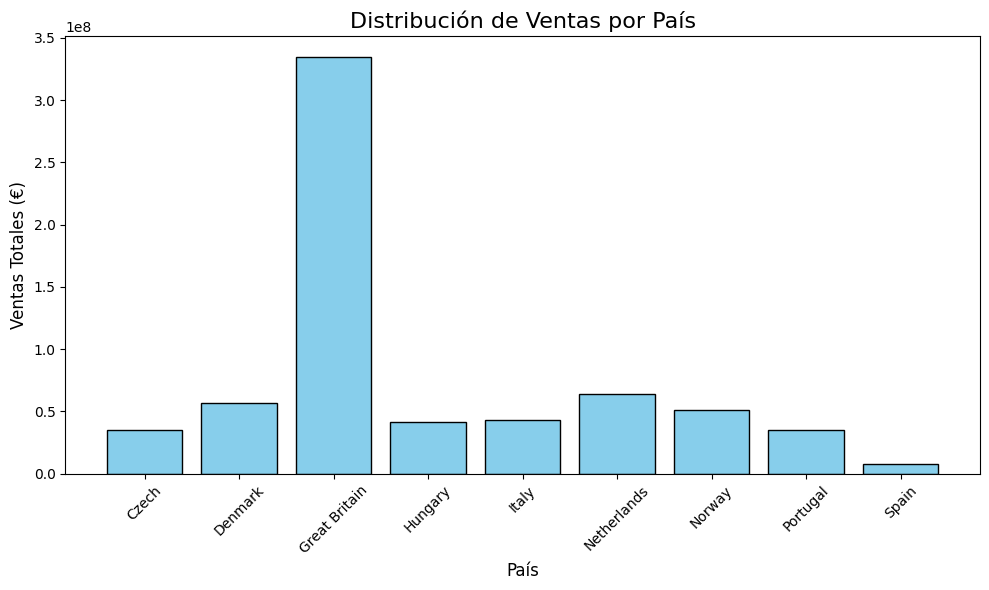

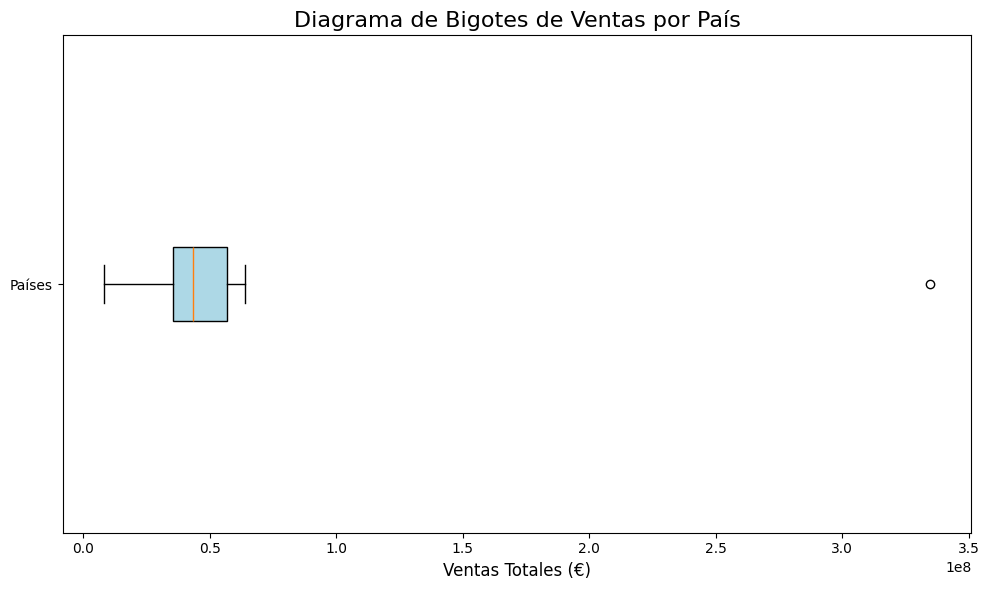

In [21]:
ventas_por_pais = ventas_reales.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_pais['COUNTRY'], ventas_por_pais['AMOUNT'], color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Ventas Totales (€)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.boxplot(ventas_por_pais['AMOUNT'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Diagrama de Bigotes de Ventas por País', fontsize=16)
plt.xlabel('Ventas Totales (€)', fontsize=12)
plt.yticks([1], ['Países'])
plt.tight_layout()
plt.show()

Distribución de ventas por mes:

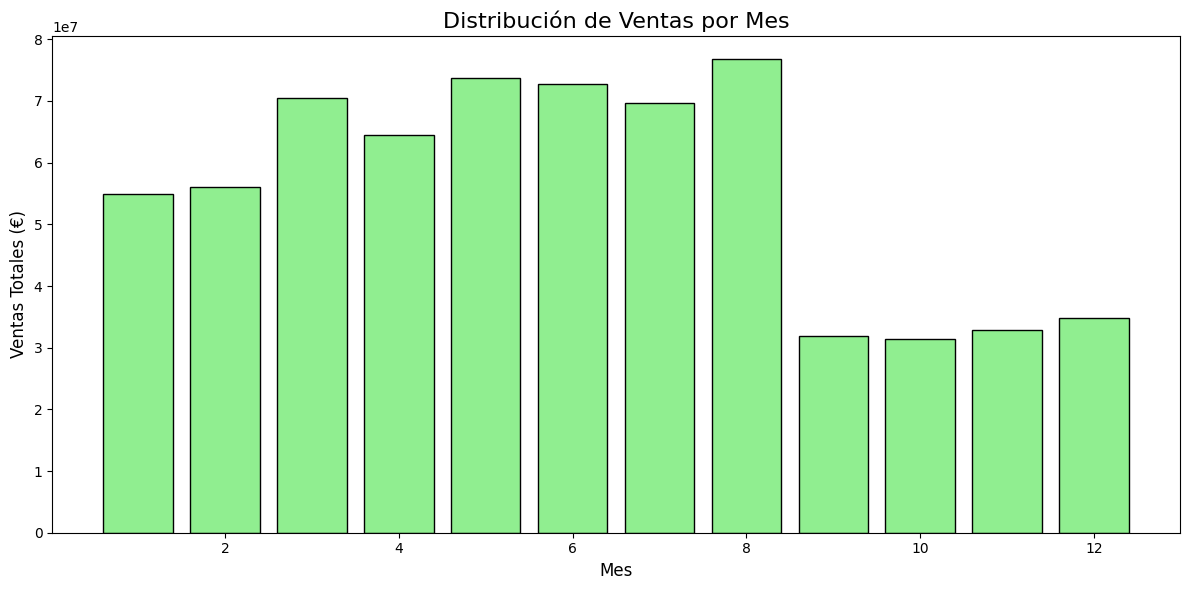

In [22]:
ventas_por_mes = ventas_reales.groupby('MONTH')['AMOUNT'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_mes['MONTH'], ventas_por_mes['AMOUNT'], color='lightgreen', edgecolor='black')
plt.title('Distribución de Ventas por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales (€)', fontsize=12)
plt.tight_layout()
plt.show()

Distribución por mes y año:

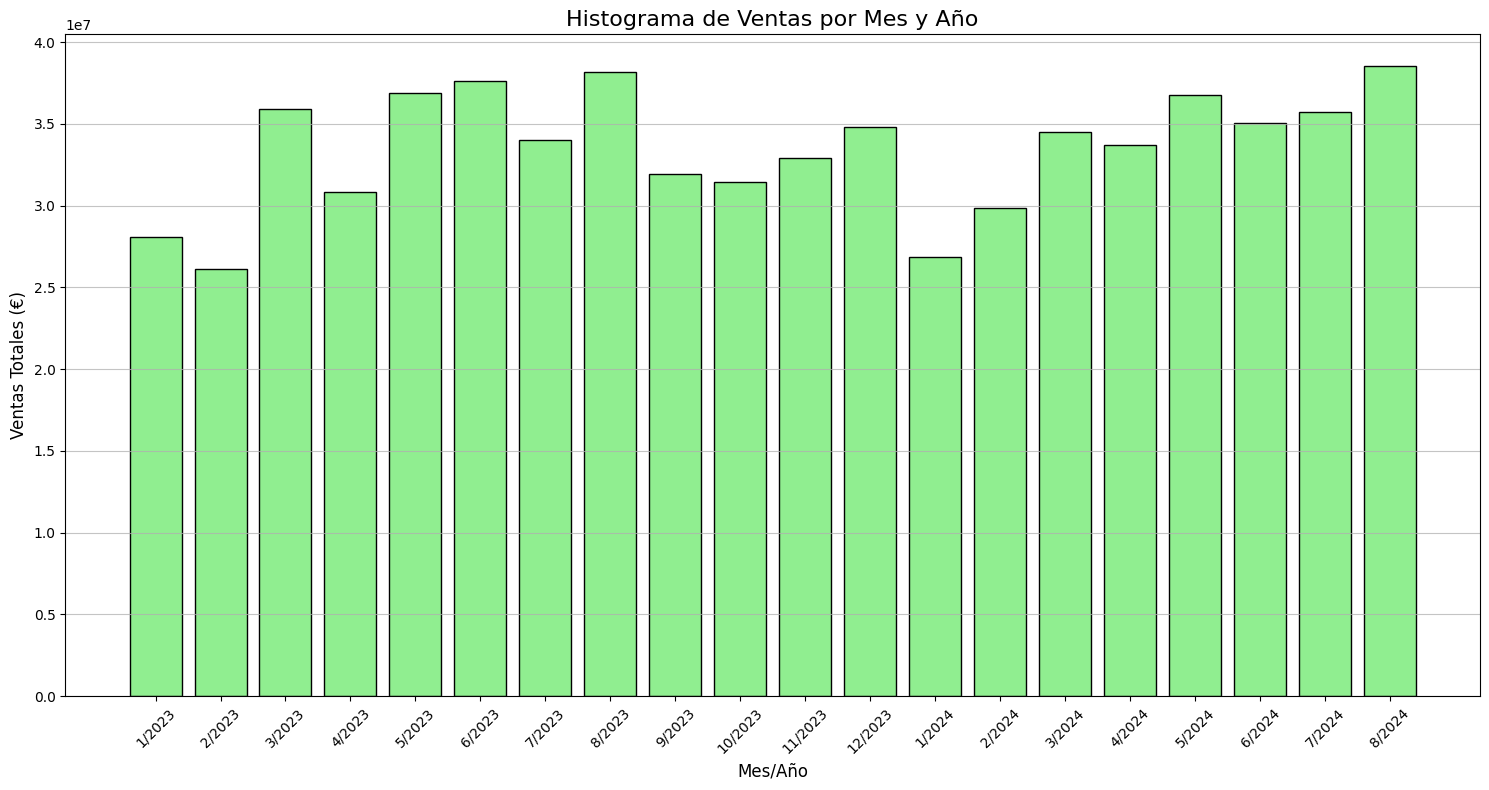

In [23]:
ventas_por_fecha = ventas_reales.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()
# Crear una nueva columna para representar la fecha en formato "mes/año"
ventas_por_fecha['Fecha'] = ventas_por_fecha['MONTH'].astype(str) + '/' + ventas_por_fecha['YEAR'].astype(str)

# Obtener los montos de ventas totales por cada combinación de mes/año
ventas_totales_por_fecha = ventas_por_fecha['AMOUNT']
fechas = ventas_por_fecha['Fecha']

# Crear el histograma
plt.figure(figsize=(15, 8))
plt.bar(fechas, ventas_totales_por_fecha, color='lightgreen', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Ventas por Mes y Año', fontsize=16)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Ventas Totales (€)', fontsize=12)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Distribución por año:

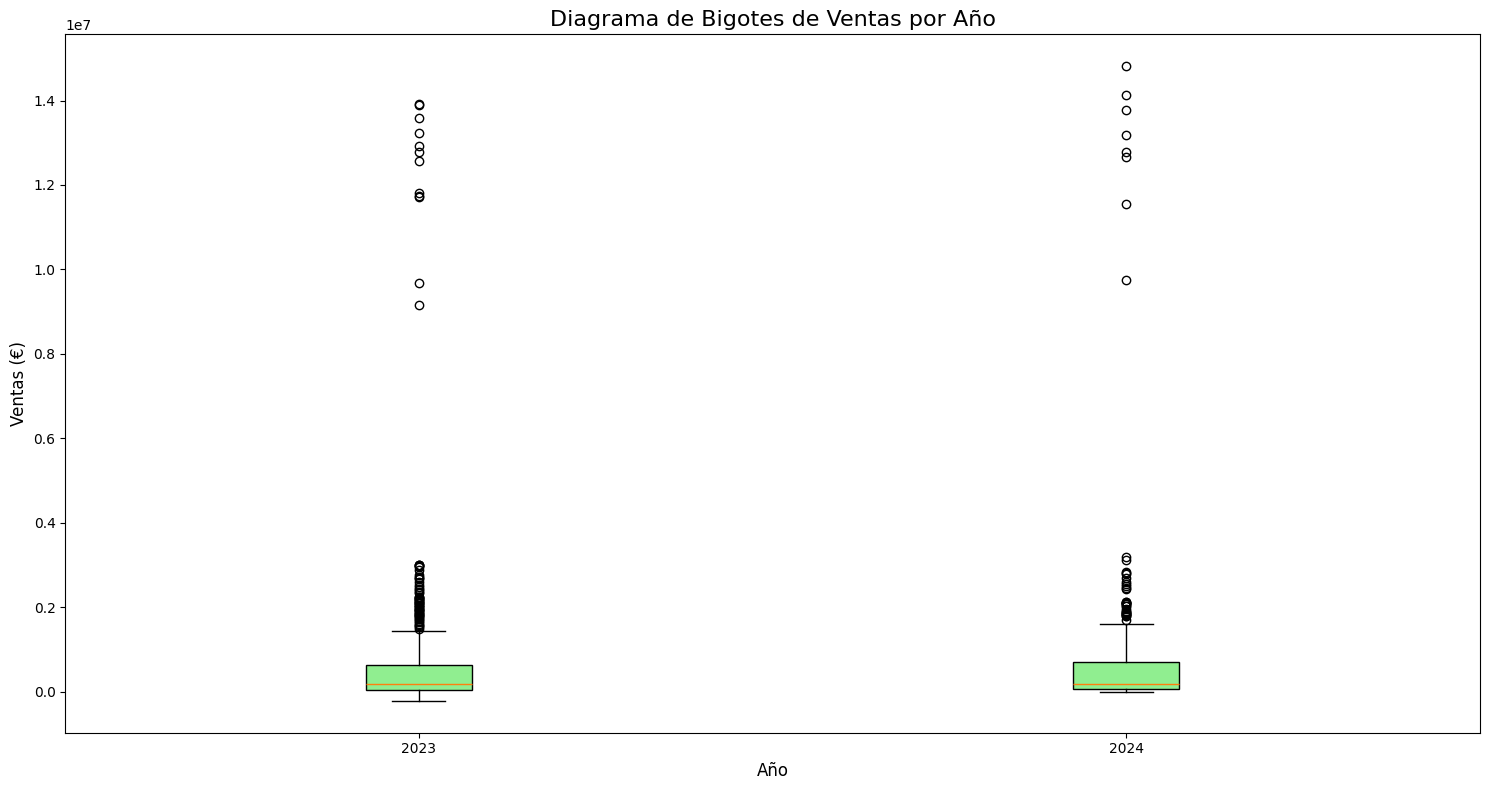

In [24]:
ventas_por_año = [ventas_reales[ventas_reales['YEAR'] == año]['AMOUNT'].values
                  for año in ventas_reales['YEAR'].unique()]

labels = ventas_reales['YEAR'].unique()
plt.figure(figsize=(15, 8))
plt.boxplot(ventas_por_año, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Diagrama de Bigotes de Ventas por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas (€)', fontsize=12)
plt.xticks(ticks=range(1, len(labels) + 1), labels=labels)
plt.tight_layout()
plt.show()

Ves si cuadra con los datos numéricos:

In [25]:
# Agrupar las ventas por año y sumar las ventas
ventas_por_año = ventas_reales.groupby('YEAR')['AMOUNT'].sum().reset_index()

# Calcular la media de ventas por año
ventas_por_año['Media'] = ventas_reales.groupby('YEAR')['AMOUNT'].mean().values

# Mostrar las medias de ventas por año
print("Media de ventas por año:")
print(ventas_por_año[['YEAR', 'Media']])

Media de ventas por año:
   YEAR          Media
0  2023  741278.447499
1  2024  748911.287270


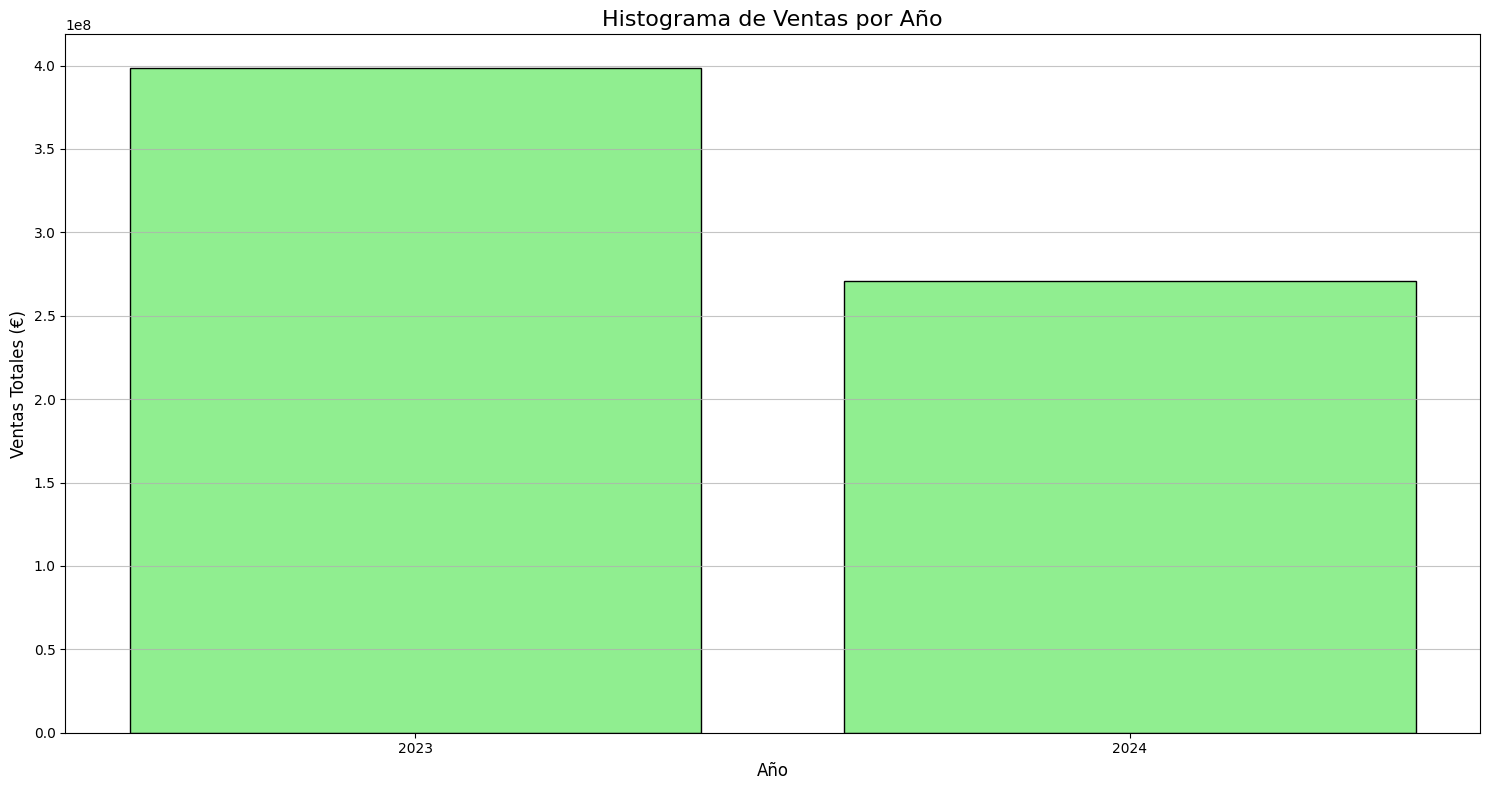

In [26]:
plt.figure(figsize=(15, 8))
plt.bar(ventas_por_año['YEAR'].astype(str), ventas_por_año['AMOUNT'], color='lightgreen', edgecolor='black')
plt.title('Histograma de Ventas por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Totales (€)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Calculamos el número total de ventas para ver que el histograma coincide con los datos.

In [27]:
total_ventas_por_año = ventas_reales.groupby('YEAR')['AMOUNT'].sum().reset_index()
total_ventas_por_año.columns = ['Año', 'Total Ventas (€)']
print(total_ventas_por_año)

    Año  Total Ventas (€)
0  2023      3.988078e+08
1  2024      2.711059e+08


Distribución por marca:

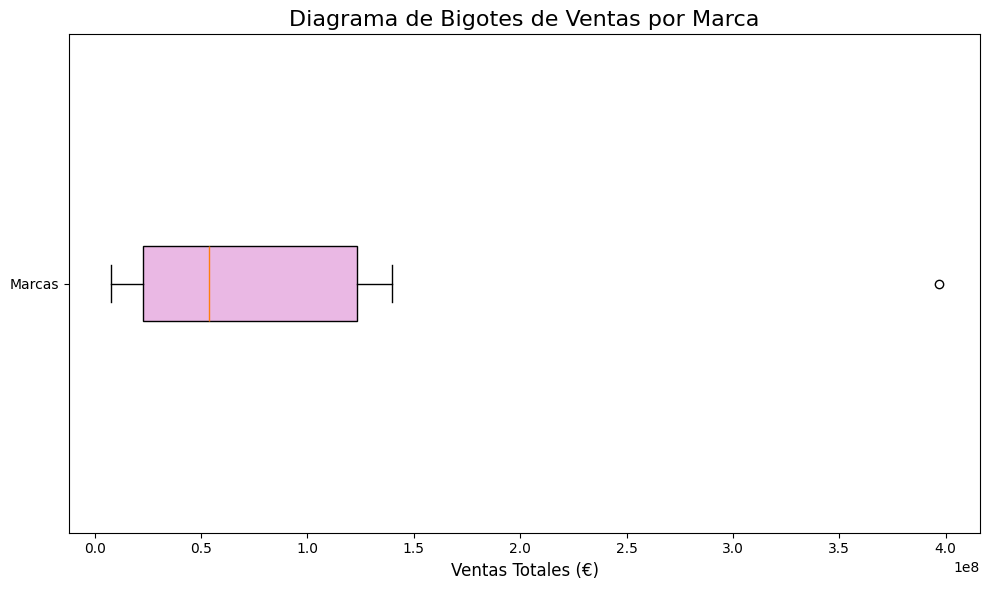

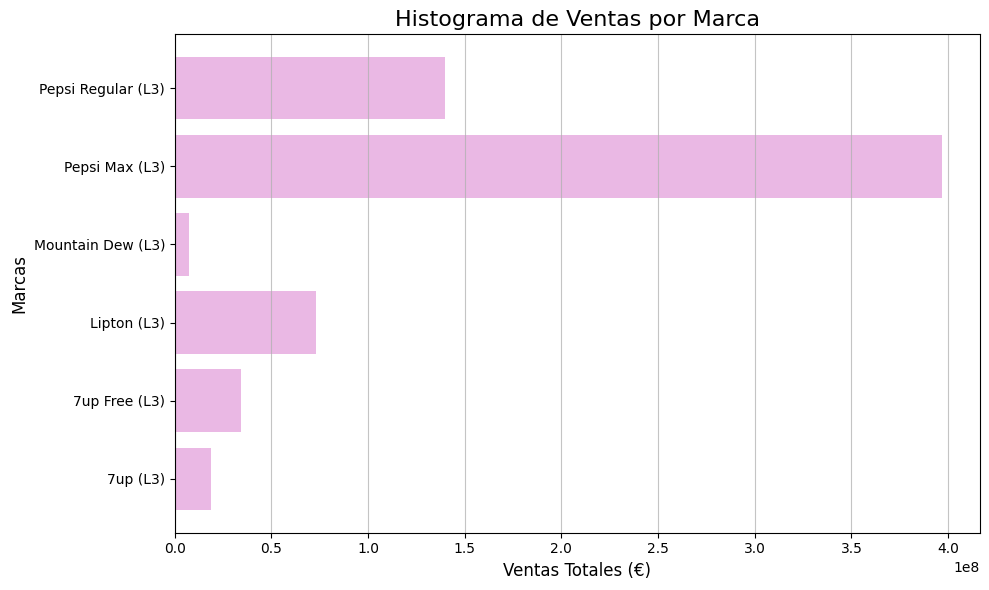

In [28]:
ventas_por_marca = ventas_reales.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.boxplot(ventas_por_marca['AMOUNT'], vert=False, patch_artist=True, boxprops=dict(facecolor='#EAB8E4'))
plt.title('Diagrama de Bigotes de Ventas por Marca', fontsize=16)
plt.xlabel('Ventas Totales (€)', fontsize=12)
plt.yticks([1], ['Marcas'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(ventas_por_marca['SUBBRAND'], ventas_por_marca['AMOUNT'], color='#EAB8E4')
plt.title('Histograma de Ventas por Marca', fontsize=16)
plt.xlabel('Ventas Totales (€)', fontsize=12)
plt.ylabel('Marcas', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

##2. Cual es la tendencia y estacionalidad de:##
  - Todas las ventas del país con menos ventas
  - La marca con más ventas

Para poder coger unicamente los datos de las ventas reales es decir los actuals, y quiarnos las predicciones de la columna de AMOUT antes de sumar los datos, primero filtramos los datos.

In [ ]:
# Filtrar solo las ventas realizadas (no las predicciones)
ventas_reales = datos[datos['SCENARIO'] == 'actual']
print(ventas_reales.head(10))

In [41]:
ventas_pais = ventas_reales.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
print("Ventas totales por país:")
print(ventas_pais)

ventas_marca = ventas_reales.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
print("\nVentas totales por marca:")
print(ventas_marca)

Ventas totales por país:
         COUNTRY        AMOUNT
0          Czech  3.535164e+07
1        Denmark  5.659668e+07
2  Great Britain  3.347786e+08
3        Hungary  4.153991e+07
4          Italy  4.345404e+07
5    Netherlands  6.395943e+07
6         Norway  5.121406e+07
7       Portugal  3.488807e+07
8          Spain  8.131266e+06

Ventas totales por marca:
             SUBBRAND        AMOUNT
0            7up (L3)  1.876851e+07
1       7up Free (L3)  3.427630e+07
2         Lipton (L3)  7.286515e+07
3   Mountain Dew (L3)  7.474391e+06
4      Pepsi Max (L3)  3.966987e+08
5  Pepsi Regular (L3)  1.398307e+08


In [42]:
pais_menos_ventas = ventas_pais.loc[ventas_pais['AMOUNT'].idxmin()]
print("\nEl país con menos ventas es:", pais_menos_ventas['COUNTRY'])
marca_mas_ventas = ventas_marca.loc[ventas_marca['AMOUNT'].idxmax()]
print("\nLa marca con más ventas es:", marca_mas_ventas['SUBBRAND'])


El país con menos ventas es: Spain

La marca con más ventas es: Pepsi Max (L3)


Una vez tenemos las datos de cual es el país con menos ventas y la marca con más ventas, vamos a hacer un diagrama de líneas para ver la tendencia y estacionalidad de ambas:


<ipython-input-44-d078aa968985>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spain['DATE'] = pd.to_datetime(Spain[['YEAR', 'MONTH']].assign(DAY=1))


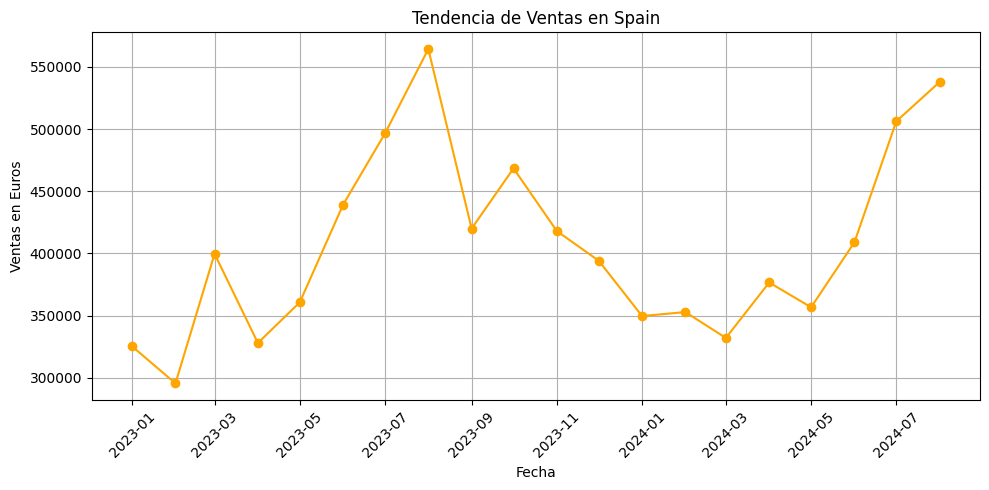

In [44]:
# Filtrar los datos para el país con menos ventas: España
Spain = ventas_reales[ventas_reales['COUNTRY'] == 'Spain']
Spain['DATE'] = pd.to_datetime(Spain[['YEAR', 'MONTH']].assign(DAY=1))
Spain = Spain.groupby('DATE')['AMOUNT'].sum().reset_index()

# Crear el gráfico de líneas para las ventas en España
plt.figure(figsize=(10, 5))
plt.plot(Spain['DATE'], Spain['AMOUNT'], marker='o', color='orange')
plt.title(f'Tendencia de Ventas en Spain')
plt.xlabel('Fecha')
plt.ylabel('Ventas en Euros')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [45]:
print("Datos filtrados para España:")
print(Spain)

Datos filtrados para España:
         DATE         AMOUNT
0  2023-01-01  325272.938930
1  2023-02-01  295588.379605
2  2023-03-01  399710.273110
3  2023-04-01  328035.257874
4  2023-05-01  360751.156280
5  2023-06-01  439198.586290
6  2023-07-01  496545.236120
7  2023-08-01  564336.120820
8  2023-09-01  420041.980591
9  2023-10-01  468425.841760
10 2023-11-01  418006.199049
11 2023-12-01  394147.408590
12 2024-01-01  349696.533142
13 2024-02-01  352899.035652
14 2024-03-01  332109.256233
15 2024-04-01  376678.368897
16 2024-05-01  356759.011786
17 2024-06-01  408967.746367
18 2024-07-01  506234.362782
19 2024-08-01  537862.283643


<ipython-input-46-483609e5a3d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PepsiM['DATE'] = pd.to_datetime(PepsiM[['YEAR', 'MONTH']].assign(DAY=1))


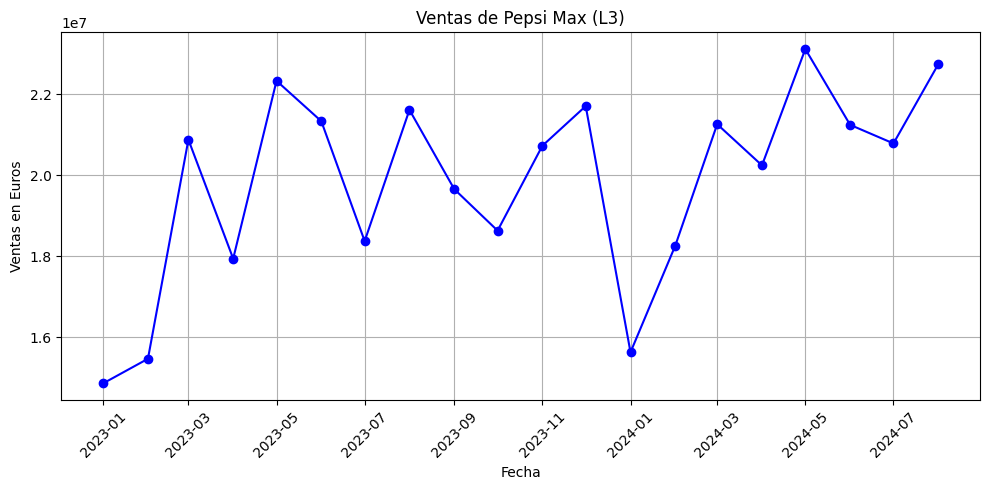

In [46]:
PepsiM = ventas_reales[ventas_reales['SUBBRAND'] == 'Pepsi Max (L3)']
PepsiM['DATE'] = pd.to_datetime(PepsiM[['YEAR', 'MONTH']].assign(DAY=1))
PepsiM = PepsiM.groupby('DATE')['AMOUNT'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(PepsiM['DATE'], PepsiM['AMOUNT'], marker='o', color='blue')
plt.title('Ventas de Pepsi Max (L3)')
plt.xlabel('Fecha')
plt.ylabel('Ventas en Euros')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [47]:
print("Datos filtrados por Pepsi Max (L3):")
print(PepsiM)

Datos filtrados por Pepsi Max (L3):
         DATE        AMOUNT
0  2023-01-01  1.485655e+07
1  2023-02-01  1.546332e+07
2  2023-03-01  2.087355e+07
3  2023-04-01  1.793494e+07
4  2023-05-01  2.232545e+07
5  2023-06-01  2.132855e+07
6  2023-07-01  1.836866e+07
7  2023-08-01  2.160818e+07
8  2023-09-01  1.965228e+07
9  2023-10-01  1.862691e+07
10 2023-11-01  2.072202e+07
11 2023-12-01  2.170186e+07
12 2024-01-01  1.562425e+07
13 2024-02-01  1.825694e+07
14 2024-03-01  2.125434e+07
15 2024-04-01  2.023834e+07
16 2024-05-01  2.311013e+07
17 2024-06-01  2.123881e+07
18 2024-07-01  2.077966e+07
19 2024-08-01  2.273393e+07


Por otro lado, aunque lo correcto es utilizar unicamente los actuals tenemos las tendencias de el pais con menos ventas y la marca con más.
Que lo que observamos es que nos siguen dando en ambos casos lo mimso pero con números más grades.

In [29]:
ventas_pais = df.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
print("Ventas totales por país:")
print(ventas_pais)

ventas_marca = df.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
print("\nVentas totales por marca:")
print(ventas_marca)

Ventas totales por país:
         COUNTRY        AMOUNT
0          Czech  6.031430e+08
1        Denmark  3.117362e+09
2  Great Britain  8.092996e+09
3        Hungary  1.062926e+09
4          Italy  4.624423e+08
5    Netherlands  1.767564e+09
6         Norway  1.807751e+09
7       Portugal  3.522935e+08
8          Spain  2.103623e+08

Ventas totales por marca:
             SUBBRAND        AMOUNT
0            7up (L3)  2.730061e+08
1       7up Free (L3)  1.032327e+09
2         Lipton (L3)  1.609163e+09
3   Mountain Dew (L3)  1.241987e+08
4      Pepsi Max (L3)  1.189868e+10
5  Pepsi Regular (L3)  2.539461e+09


In [30]:
pais_menos_ventas = ventas_pais.loc[ventas_pais['AMOUNT'].idxmin()]
print("\nEl país con menos ventas es:", pais_menos_ventas['COUNTRY'])
marca_mas_ventas = ventas_marca.loc[ventas_marca['AMOUNT'].idxmax()]
print("\nLa marca con más ventas es:", marca_mas_ventas['SUBBRAND'])


El país con menos ventas es: Spain

La marca con más ventas es: Pepsi Max (L3)


Una vez tenemos las datos de cual es el país con menos ventas y la marca con más ventas, vamos a hacer un diagrama de líneas para ver la tendencia y estacionalidad de ambas:


<ipython-input-31-49cfe57e7dcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spain['DATE'] = pd.to_datetime(Spain[['YEAR', 'MONTH']].assign(DAY=1))


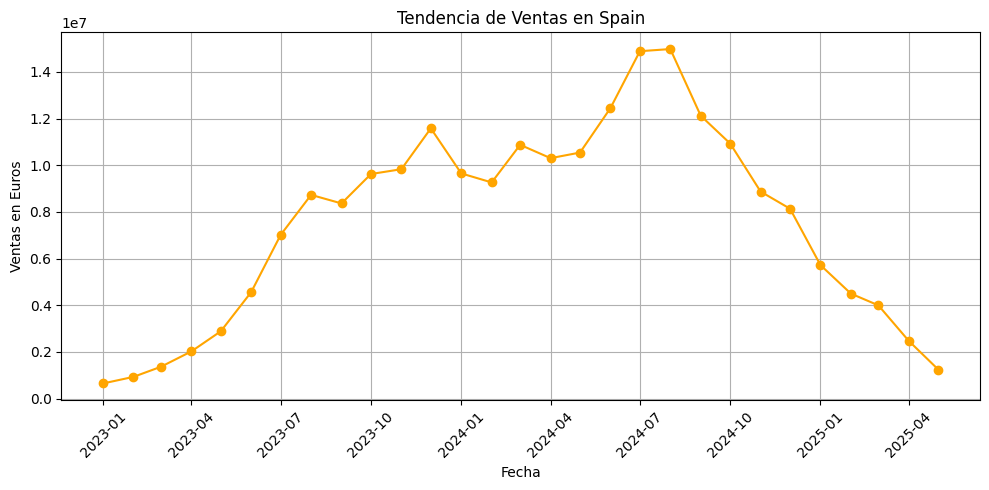

In [31]:
# Filtrar los datos para el país con menos ventas: España
Spain = datos[datos['COUNTRY'] == 'Spain']
Spain['DATE'] = pd.to_datetime(Spain[['YEAR', 'MONTH']].assign(DAY=1))
Spain = Spain.groupby('DATE')['AMOUNT'].sum().reset_index()

# Crear el gráfico de líneas para las ventas en España
plt.figure(figsize=(10, 5))
plt.plot(Spain['DATE'], Spain['AMOUNT'], marker='o', color='orange')
plt.title(f'Tendencia de Ventas en Spain')
plt.xlabel('Fecha')
plt.ylabel('Ventas en Euros')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
print("Datos filtrados para España:")
print(Spain)

Datos filtrados para España:
         DATE        AMOUNT
0  2023-01-01  6.480650e+05
1  2023-02-01  9.297848e+05
2  2023-03-01  1.362918e+06
3  2023-04-01  2.021081e+06
4  2023-05-01  2.884209e+06
5  2023-06-01  4.564861e+06
6  2023-07-01  7.015604e+06
7  2023-08-01  8.729780e+06
8  2023-09-01  8.362929e+06
9  2023-10-01  9.623890e+06
10 2023-11-01  9.830212e+06
11 2023-12-01  1.158169e+07
12 2024-01-01  9.649538e+06
13 2024-02-01  9.262759e+06
14 2024-03-01  1.087509e+07
15 2024-04-01  1.030335e+07
16 2024-05-01  1.054322e+07
17 2024-06-01  1.244852e+07
18 2024-07-01  1.488732e+07
19 2024-08-01  1.497951e+07
20 2024-09-01  1.212151e+07
21 2024-10-01  1.092977e+07
22 2024-11-01  8.871117e+06
23 2024-12-01  8.136421e+06
24 2025-01-01  5.720172e+06
25 2025-02-01  4.498045e+06
26 2025-03-01  3.995821e+06
27 2025-04-01  2.470962e+06
28 2025-05-01  1.245424e+06


<ipython-input-33-d3cc2889d01b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PepsiM['DATE'] = pd.to_datetime(PepsiM[['YEAR', 'MONTH']].assign(DAY=1))


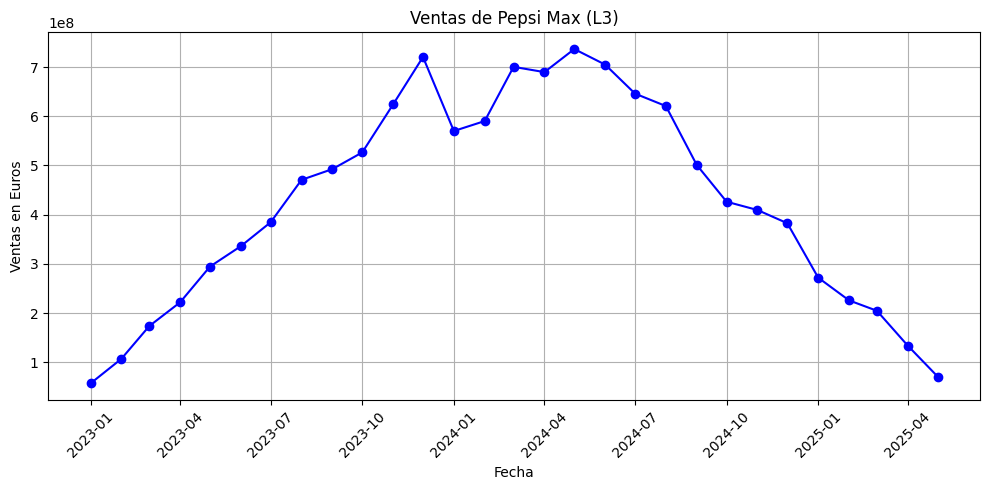

In [33]:
PepsiM = datos[datos['SUBBRAND'] == 'Pepsi Max (L3)']
PepsiM['DATE'] = pd.to_datetime(PepsiM[['YEAR', 'MONTH']].assign(DAY=1))
PepsiM = PepsiM.groupby('DATE')['AMOUNT'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(PepsiM['DATE'], PepsiM['AMOUNT'], marker='o', color='blue')
plt.title('Ventas de Pepsi Max (L3)')
plt.xlabel('Fecha')
plt.ylabel('Ventas en Euros')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
print("Datos filtrados por Pepsi Max (L3):")
print(PepsiM)

Datos filtrados por Pepsi Max (L3):
         DATE        AMOUNT
0  2023-01-01  5.696908e+07
1  2023-02-01  1.069651e+08
2  2023-03-01  1.735418e+08
3  2023-04-01  2.218363e+08
4  2023-05-01  2.944805e+08
5  2023-06-01  3.359552e+08
6  2023-07-01  3.846688e+08
7  2023-08-01  4.708179e+08
8  2023-09-01  4.926599e+08
9  2023-10-01  5.266032e+08
10 2023-11-01  6.242520e+08
11 2023-12-01  7.205284e+08
12 2024-01-01  5.700743e+08
13 2024-02-01  5.903296e+08
14 2024-03-01  7.005172e+08
15 2024-04-01  6.897863e+08
16 2024-05-01  7.366773e+08
17 2024-06-01  7.050120e+08
18 2024-07-01  6.461009e+08
19 2024-08-01  6.207940e+08
20 2024-09-01  5.011117e+08
21 2024-10-01  4.263469e+08
22 2024-11-01  4.094959e+08
23 2024-12-01  3.826208e+08
24 2025-01-01  2.720038e+08
25 2025-02-01  2.258052e+08
26 2025-03-01  2.046906e+08
27 2025-04-01  1.337662e+08
28 2025-05-01  7.097236e+07


##3. Cuales son las predicciones hechas en España y como de buenas son ##

Paso 1: Filtrar las predicciones hechas en España y los datos reales
  - AI_forecast: una venta que se ha predicho - actual: venta que se ha producido



In [35]:
predicciones_spain = datos[(datos['COUNTRY'] == 'Spain') & (datos['SCENARIO'] == 'AI_forecast')]
reales_spain = datos[(datos['COUNTRY'] == 'Spain') & (datos['SCENARIO'] == 'actual')]

Paso 2: Unir las predicciones con los valores reales (por YEAR, MONTH, SUBBRAND)

In [36]:
comparacion = pd.merge(predicciones_spain, reales_spain, on=['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH'], suffixes=('_pred', '_real'))

Paso 3: Calcular el error (diferencia entre predicción y valor real)

In [37]:
comparacion['ERROR'] = comparacion['AMOUNT_real'] - comparacion['AMOUNT_pred']
comparacion['PERCENTAGE_ERROR'] = (comparacion['ERROR'] / comparacion['AMOUNT_real']) * 100

In [38]:
print("Comparación entre predicciones y valores reales:")
print(comparacion[['YEAR', 'MONTH', 'SUBBRAND', 'AMOUNT_pred', 'AMOUNT_real', 'ERROR', 'PERCENTAGE_ERROR']])

Comparación entre predicciones y valores reales:
      YEAR  MONTH            SUBBRAND    AMOUNT_pred    AMOUNT_real  \
0     2023     12      Pepsi Max (L3)   88501.980847  105442.112234   
1     2023     12  Pepsi Regular (L3)  134268.151080  115494.267625   
2     2024      1       7up Free (L3)   70144.329753   60318.994231   
3     2024      4            7up (L3)   38882.921227   74882.992962   
4     2024      1  Pepsi Regular (L3)  132236.387105  113340.611790   
...    ...    ...                 ...            ...            ...   
1552  2023      4  Pepsi Regular (L3)  109407.155303   99838.514061   
1553  2023      4         Lipton (L3)    5561.750886    9617.009842   
1554  2024      3      Pepsi Max (L3)  117771.620781   95639.028411   
1555  2024      1  Pepsi Regular (L3)  107080.159342  113340.611790   
1556  2024      3  Pepsi Regular (L3)  120652.827718  100264.407938   

             ERROR  PERCENTAGE_ERROR  
0     16940.131387         16.065812  
1    -18773.883456  

Calculamos el error absoluto medio (MAE) y el error porcentual medio (MAPE)

In [39]:
mae = comparacion['ERROR'].abs().mean()
print(f"\nError Absoluto Medio (MAE): {mae}")

mape = comparacion['PERCENTAGE_ERROR'].abs().mean()
print(f"Error Porcentual Medio (MAPE): {mape}%")


Error Absoluto Medio (MAE): 15741.400362505825
Error Porcentual Medio (MAPE): 17.7866566152518%


Con el MAE de 15.741,40 euros significa que, en promedio, las predicciones de ventas en España se desviaron del valor real por unos 15.741,40 euros.

Por otro lado con el MAPE: 17.79%, es el porcentaje del error. Las prediciones se desvian ese porcentaje del valor real.

<ipython-input-40-a0e292ae3a62>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  comparacion_resampled = comparacion.resample('M').sum()  # Cambiar a 'Q' para trimestral si es necesario, 'M' para agrupar por mes


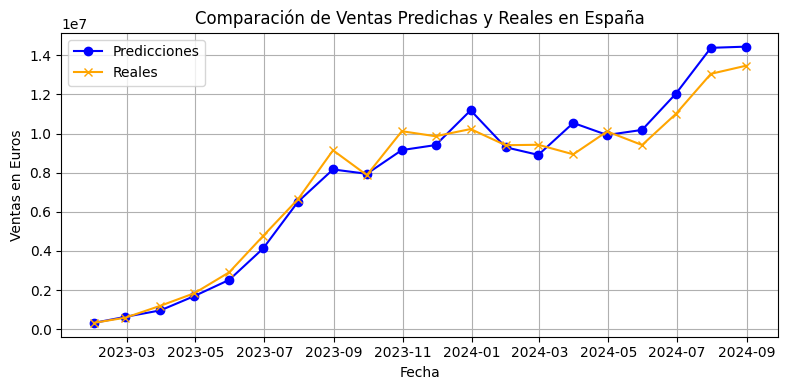

In [40]:
# Crear una columna DATE a partir de YEAR y MONTH
comparacion['DATE'] = pd.to_datetime(comparacion[['YEAR', 'MONTH']].assign(DAY=1))

# Paso 4: Graficar los valores predichos y reales
plt.figure(figsize=(8, 4))  # Tamaño más pequeño para mejor claridad

# Títulos y etiquetas
plt.title('Comparación de Ventas Predichas y Reales en España')
plt.xlabel('Fecha')
plt.ylabel('Ventas en Euros')

# Agrupando por meses para reducir el número de puntos
# Resampleo de la fecha para agrupar por mes (o trimestre, dependiendo de lo que quieras)
comparacion.set_index('DATE', inplace=True)
comparacion_resampled = comparacion.resample('M').sum()  # Cambiar a 'Q' para trimestral si es necesario, 'M' para agrupar por mes

# Graficar los valores resampleados
plt.plot(comparacion_resampled.index, comparacion_resampled['AMOUNT_pred'], label='Predicciones', marker='o', color='blue')
plt.plot(comparacion_resampled.index, comparacion_resampled['AMOUNT_real'], label='Reales', marker='x', color='orange')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()
